## Criação dos Cenários

###### Importando as bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

###### Estudo do Banco de dados base 

In [2]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv') 
df_sample = df.sample(frac=0.01)
df_sample.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6182328,566,PAYMENT,22469.23,C1928656983,134558.0,112088.77,M1080464722,0.00,0.00,0,0
4145930,303,CASH_OUT,207317.18,C114047307,963.0,0.00,C1962852089,9583.20,216900.38,0,0
1599612,156,CASH_OUT,434587.84,C1058634218,151808.0,0.00,C1245565597,220294.91,654882.74,0,0
1827880,163,CASH_IN,244545.23,C1243195224,509330.0,753875.23,C1639998215,554268.58,309723.35,0,0
4248122,306,CASH_OUT,161007.15,C2121999904,50666.0,0.00,C914243949,820684.77,1118959.78,0,0


In [3]:
df_sample.shape

(63626, 11)

In [4]:
df_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,63626.000000,6.362600e+04,6.362600e+04,6.362600e+04,6.362600e+04,6.362600e+04,63626.000000,63626.0
mean,243.201270,1.816530e+05,8.232601e+05,8.449794e+05,1.089422e+06,1.213574e+06,0.001242,0.0
std,142.860294,6.366816e+05,2.840648e+06,2.876680e+06,3.256463e+06,3.607005e+06,0.035215,0.0
min,1.000000,1.870000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,155.000000,1.349015e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,238.000000,7.513727e+04,1.388774e+04,0.000000e+00,1.326240e+05,2.091304e+05,0.000000,0.0
75%,335.000000,2.078003e+05,1.066612e+05,1.442419e+05,9.280931e+05,1.093818e+06,0.000000,0.0
max,741.000000,4.675140e+07,3.636535e+07,3.667630e+07,2.038274e+08,2.359512e+08,1.000000,0.0


In [12]:
import warnings
warnings.filterwarnings("ignore")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F6B45E4648>,
      dtype=object)

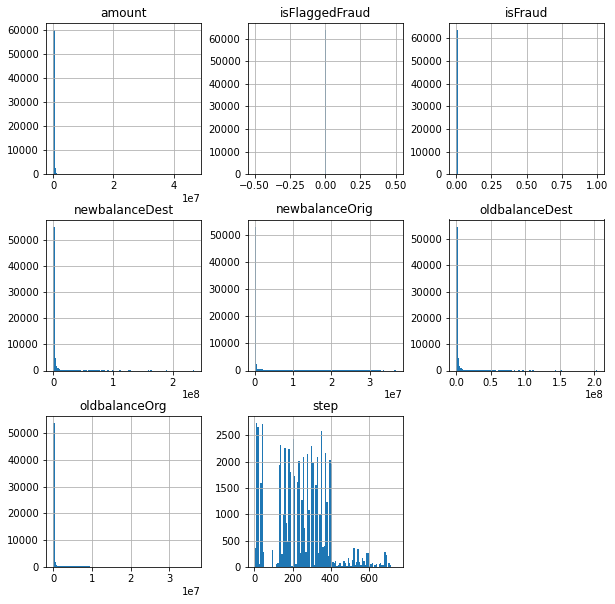

In [30]:
df_sample.hist(bins=100,  figsize = (10,10))

In [6]:
df_clean = df_sample.drop(columns=['step','isFraud','isFlaggedFraud'])
mean = df_clean.mean()
cov = df_clean.cov()
cov

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,4.053634e+11,-7.236341e+09,-1.565961e+10,8.022792e+11,1.271784e+12
oldbalanceOrg,-7.236341e+09,8.069283e+12,8.161800e+12,6.186521e+11,4.145930e+11
newbalanceOrig,-1.565961e+10,8.161800e+12,8.275286e+12,6.426133e+11,4.209961e+11
oldbalanceDest,8.022792e+11,6.186521e+11,6.426133e+11,1.060455e+13,1.145705e+13
newbalanceDest,1.271784e+12,4.145930e+11,4.209961e+11,1.145705e+13,1.301048e+13


In [7]:
#mean=[1.732522e+05, 8.372630e+05,8.594474e+05,1.093458e+06,1.207646e+06]
#cov = [[2, -0.003965], [-0.003965, 1]]
s1, s2, s3, s4, s5 = np.random.multivariate_normal(mean, cov, 5000).T
base = pd.DataFrame({'valor':s1,'saldo_antigo_origem':s2,'saldo_novo_origem':s3,'saldo_antigo_destino':s4,'saldo_novo_destino':s5})
base.describe()

,valor,saldo_antigo_origem,saldo_novo_origem,saldo_antigo_destino,saldo_novo_destino
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,1.718898e+05,8.245704e+05,8.481986e+05,1.094882e+06,1.216303e+06
std,6.233713e+05,2.859912e+06,2.897946e+06,3.209909e+06,3.551971e+06
min,-2.388832e+06,-9.394652e+06,-9.474982e+06,-1.192787e+07,-1.210988e+07
25%,-2.448669e+05,-1.107787e+06,-1.099360e+06,-1.174269e+06,-1.235763e+06
50%,1.604943e+05,8.177699e+05,8.549960e+05,1.080379e+06,1.198289e+06
75%,5.864941e+05,2.743754e+06,2.803058e+06,3.308265e+06,3.698838e+06
max,2.820332e+06,9.944321e+06,9.953870e+06,1.284551e+07,1.334134e+07


## Cenário 1

Nesse cenário, iremos construir um banco de dados onde a variável resposta é se o cliente que está solicitando um emprestimo é fraude ou não e serão construidas 20 variáveis preditoras. Para a criação das variáveis, iremos utilizar um banco de dados real para considerar a correlação entre as variáveis.


###### Definindo o tamanho da amostra  

In [2]:
n1 = 200000

### 1 - Criando as variáveis preditoras 

In [3]:
np.random.seed(71)

# 1- sexo do cliente
sexo_categ = ['Feminino', 'Masculino']
sexo_prob = [.52, .48]
sexo = np.random.choice(sexo_categ, n1, p=sexo_prob)

# 2- nivel de escolaridade 
nivel_escolaridade = []
prop_mulheres = [.48,.14,.25,.13] #dados retirados do site do IBGE (censo2010)
prop_homens = [.51,.15,.24,.1]
niveis = ["Sem instrução e ensino fundamental incompleto", "Ensino fundamental completo e médio incompleto", "Ensino médio completo e superior incompleto", "Ensino superior completo"]

nivel_mulher = np.random.choice(niveis, n1, p=prop_mulheres)
nivel_homem = np.random.choice(niveis, n1, p=prop_homens)

for i in range(0,n1):
    if sexo[i] == "Feminino":
        nivel_escolaridade.append(nivel_mulher[i])
    else:
        nivel_escolaridade.append(nivel_homem[i])

# 3- faixa etária
faixa_etaria = []
prop_mulheres = [.12,.71,.17] #dados do IBGE
prop_homens = [.14,.71,.15]
faixa = ["Jovem (até 19 anos)", "Adulto (de 20 à 59 anos)", "Idoso (acima de 60 anos)"]

faixa_mulher = np.random.choice(faixa, n1, p=prop_mulheres)
faixa_homem = np.random.choice(faixa, n1, p=prop_homens)

for i in range(0,n1):
    if sexo[i] == "Feminino":
        faixa_etaria.append(faixa_mulher[i])
    else:
        faixa_etaria.append(faixa_homem[i])

for i in range(0,n1):
    if faixa_etaria[i] == "Jovem (até 19 anos)":
        nivel_escolaridade[i] =  np.random.choice(["Sem instrução e ensino fundamental incompleto", "Ensino fundamental completo e médio incompleto", "Ensino médio completo e superior incompleto"])

# 4- estado civil 
estado_civil_categ = ['Casado(a)', 'Solteiro(a)', 'Divorciado(a)', 'Viúvo(a)']
estado_civil_prob = [.458, .428, .054, .06] #dados do IBGE
estado_civil = np.random.choice(estado_civil_categ, n1, p=estado_civil_prob)

for i in range(0,n1):
    if faixa_etaria[i] == "Jovem (até 19 anos)":
        estado_civil[i] =  np.random.choice(['Casado(a)', 'Solteiro(a)'],p=[0.1,0.9])
    elif faixa_etaria[i] == "Idoso (acima de 60 anos)":
        estado_civil[i] =  np.random.choice(estado_civil_categ,p=[0.4,0.05,0.3,0.25])

# 5- variável idade
idade = []

for i in range(0,n1):
    if faixa_etaria[i] == "Jovem (até 19 anos)":
        idade.append(np.random.randint(18, 20))
    elif faixa_etaria[i] == "Idoso (acima de 60 anos)":
        idade.append(np.random.randint(60, 80))
    else:
        idade.append(np.random.randint(20, 60))
        
# 6- classe economica familiar 
classe = ['Classe baixa', 'Classe média', 'Elite']
prop = [0.47,.47,.06] #dados da folha
classe_economica_familiar = np.random.choice(classe, n1, p=prop)

for i in range(0,n1):
    if nivel_escolaridade[i] == "Ensino superior completo":
        prop1 = [.35,.51,.14]
        classe_economica_familiar[i] = np.random.choice(classe, p=prop1)


# 7- variável renda (1 salário minimo equivale a R$ 1.100)
# referencia: https://static.poder360.com.br/2021/04/impacto-economico-na-classe-media-2021.pdf
renda = []

for i in range(0,n1):
    if classe_economica_familiar[i] == 'Classe baixa':
        aux = np.random.normal(0.1,0.15) + 0.02*idade[i]
        renda.append(np.around(aux,2)) 
    elif classe_economica_familiar[i] == 'Classe média':
        aux = np.random.normal(1.2,0.5) + 0.05*idade[i]
        renda.append(np.around(aux,2))
    else:
        aux = np.random.normal(20,3.55) + 0.1*idade[i]
        renda.append(np.around(aux,2))

for i in range(0,n1):
    if renda[i] < 0.1:
        renda[i] = 0

# 8- responsavel pela renda familiar
classe = [0,1]
responsavel_renda_familiar = []

for i in range(0,n1):
    if renda[i] == 0:
        responsavel_renda_familiar.append(0)
    elif classe_economica_familiar[i] == 'Classe baixa' and renda[i]/2.1 > 0.5:
        responsavel_renda_familiar.append(1)
    elif classe_economica_familiar[i] == 'Classe média' and renda[i]/7 > 0.5:
        responsavel_renda_familiar.append(1)
    elif classe_economica_familiar[i] == 'Elite' and renda[i]/20 > 0.5:
        responsavel_renda_familiar.append(1)
    else:
        responsavel_renda_familiar.append(np.random.choice(classe,p=[.7,.3]))

# 9- variável despesas mensais com saúde (proporção referente ao salário da pessoa)
despesa_saude = np.random.beta(3,19,n1).round(2)
        
# 10- variável trabalho
trabalho_categ = ['Trabalha regularmente', 'Desempregado', 'Estudante']
trabalho_prob = [0.72,0.11,0.17]
trabalho = np.random.choice(trabalho_categ, n1, p=trabalho_prob)

for i in range(0,n1):
    if responsavel_renda_familiar[i] == 1:
        trabalho[i] == 'Trabalha regularmente'

# 11- variável tempo de trabalho no atual emprego
tempo_trabalho = []
for i in range(0,n1):
    if trabalho[i]=='Estudante' or trabalho[i] == 'Desempregado':
        tempo_trabalho.append('Sem emprego')
    elif faixa_etaria[i] == "Jovem (até 19 anos)" or idade[i] < 21 and trabalho[i] == "Trabalha regularmente":
        tempo_trabalho.append(np.random.choice(['Menos de 1 ano','1 a 4 anos'],p=[0.4,0.6]))
    else:
        tempo_trabalho_categ = ['Menos de 1 ano','1 a 4 anos', '4 a 7 anos', 'Mais de 7 anos']
        tempo_trabalho_prob  = [0.17,0.59,0.14,0.1]
        temp_trabalho = np.random.choice(tempo_trabalho_categ, p=tempo_trabalho_prob)
        tempo_trabalho.append(temp_trabalho)

# 12- variável casa
casa_categ = ['Própria', 'Alugada', 'Cedida']
casa_prob = [0.2, 0.61, 0.19]
casa = np.random.choice(casa_categ, n1, p=casa_prob)

# 13- variável região
regiao_categ = ['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul',]
regiao_prob = [0.08,0.27,0.09,0.42,0.14]
regiao = np.random.choice(regiao_categ, n1, p=regiao_prob)

# 14- variável tem conta em banco (sim=1, não=0)
conta = np.random.binomial(1,0.71,n1)

# 15- variável membro ativo no banco (sim=1, não tem conta=0)
ativo = []
cont = np.random.binomial(1,0.58,n1)
for i in range(0,n1):
    if conta[i] == 1:
        ativo.append(cont[i])
    else:
        ativo.append(0)

# 16- variável cartão (sim=1, não=0)
cartao = np.random.binomial(1,0.83,n1)

# 17- variável valor da ultima fatura do cartão de crédito (porcentagem em relação ao salário da pessoa)
valor_fatura = []
aux = np.random.beta(2,5,n1).round(2)

for i in range(0,n1):
    if cartao[i] == 1:
        valor_fatura.append(aux[i])
    else:
        valor_fatura.append(0)

# 18- tem fatura em atraso
fatura_atraso = []

for i in range(0,n1):
    if cartao[i] == 1:
        fatura_atraso.append((np.random.choice([1,0], p=[0.11,0.89])))
    else:
        fatura_atraso.append(0)
        
# 19- tem nome negativado
nome_negativado = []

for i in range(0,n1):
    if fatura_atraso[i] == 1:
        nome_negativado.append((np.random.choice([1,0], p=[0.89,0.11])))
    else:
        nome_negativado.append((np.random.choice([1,0], p=[0.04,0.96])))

# 20- variável porcentagem paga da última fatura do cartão de crédito
porc_paga_fatura = []

for i in range(0,n1):
    if fatura_atraso[i] == 1:
        porc_paga_fatura.append(np.around(np.random.beta(1,7),2))
    else:
        porc_paga_fatura.append(1)

# 21- CPF ativo
cpf_ativo = np.random.choice([1,0], n1, p=[0.98,.02])

# 22- score de fraude fornecido pelo bureau é maior que o ponto de corte
score_fraude_maior_ponto_corte = []

for i in range(0,n1):
    if cpf_ativo[i] == 0:
        score_fraude_maior_ponto_corte.append(1)
    else:
        score_fraude_maior_ponto_corte.append(np.random.choice([1,0], p=[0.07,0.93]))

# 23- Foto tirada na abertura da conta bate com a foto do documento fornecido
foto_semelhante_documento = []

for i in range(0,n1):
    if score_fraude_maior_ponto_corte[i] == 1:
        foto_semelhante_documento.append(np.random.choice([1,0], p=[0.85,0.15])) #pode ter casos de documentos adulterados 
    else:
        foto_semelhante_documento.append(np.random.choice([1,0], p=[0.95,0.05]))

##### Criando o banco de dados com as variáveis preditoras

In [24]:
# Criando o dicionário das variáveis
dict1 = {'sexo':sexo, 'nivel_escolaridade':nivel_escolaridade, 'faixa_etaria': faixa_etaria, 'estado_civil': estado_civil,
        'idade':idade, 'classe_economica_familiar':classe_economica_familiar, 'renda':renda, 'despesa_saude':despesa_saude,
        'responsavel_renda_familiar':responsavel_renda_familiar, 'trabalho':trabalho, 'tempo_trabalho': tempo_trabalho,
        'casa':casa, 'regiao': regiao, 'conta':conta, 'ativo': ativo, 'cartao': cartao, 'valor_fatura': valor_fatura,
        'fatura_atraso':fatura_atraso, 'nome_negativado':nome_negativado, 'porc_paga_fatura ': porc_paga_fatura, 
        'cpf_ativo':cpf_ativo,'score_fraude_maior_ponto_corte':score_fraude_maior_ponto_corte, 
        'foto_semelhante_documento':foto_semelhante_documento}

# Criando o dataframe
data1 = pd.DataFrame(dict1)
data1.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,idade,classe_economica_familiar,renda,despesa_saude,responsavel_renda_familiar,trabalho,...,conta,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,porc_paga_fatura,cpf_ativo,score_fraude_maior_ponto_corte,foto_semelhante_documento
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),49,Classe média,3.58,0.04,1,Trabalha regularmente,...,1,1,1,0.21,0,0,1.0,1,0,1
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),56,Classe baixa,1.33,0.23,1,Trabalha regularmente,...,0,0,1,0.32,0,1,1.0,1,0,1
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),51,Classe média,4.29,0.08,1,Trabalha regularmente,...,1,1,0,0.00,0,0,1.0,1,0,1
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),73,Classe baixa,1.42,0.04,1,Trabalha regularmente,...,0,0,1,0.45,0,0,1.0,1,0,1
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),75,Classe baixa,1.82,0.13,1,Trabalha regularmente,...,0,0,1,0.30,0,0,1.0,1,0,1


##### Transformando as variáveis categoricas em dummies

Referencia sexo: feminino;

Referencia nivel de escolaridade: ensino fundamental completo e médio incompleto;

Referencia faixa etaria: adulto;

Referencia estado civil: casado(a);

Referencia classe economica familiar: classe baixa.

Referencia de trabalho: desempregado;

Referencia de tempo de trabalho: 1 a 4 anos;  

Referencia de casa: alugada;

Referencia de região: centro-oeste.

In [18]:
data1 = pd.get_dummies(data1, drop_first=True)
data1.head()

,idade,renda,despesa_saude,responsavel_renda_familiar,conta,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,...,tempo_trabalho_4 a 7 anos,tempo_trabalho_Mais de 7 anos,tempo_trabalho_Menos de 1 ano,tempo_trabalho_Sem emprego,casa_Cedida,casa_Própria,regiao_Nordeste,regiao_Norte,regiao_Sudeste,regiao_Sul
0,49,3.58,0.04,1,1,1,1,0.21,0,0,...,0,0,0,0,1,0,1,0,0,0
1,56,1.33,0.23,1,0,0,1,0.32,0,1,...,0,0,0,0,0,1,1,0,0,0
2,51,4.29,0.08,1,1,1,0,0.00,0,0,...,1,0,0,0,1,0,0,0,0,0
3,73,1.42,0.04,1,0,0,1,0.45,0,0,...,1,0,0,0,0,0,0,0,1,0
4,75,1.82,0.13,1,0,0,1,0.30,0,0,...,0,0,0,0,0,1,0,0,1,0


In [19]:
# Alterando o nome das variáveis 
data1 = data1.rename(columns={'estado_civil_Divorciado(a)': 'estado_civil_divorciado','estado_civil_Solteiro(a)':'estado_civil_solteiro', 
                    'estado_civil_Viúvo(a)': 'estado_civil_viuvo', 'classe_economica_familiar_Elite':'classe_economica_familiar_elite',
                    'classe_economica_familiar_Classe média':'classe_economica_familiar_classe_media','sexo_Masculino': 'sexo_masculino',
                    'faixa_etaria_Idoso (acima de 60 anos)':'faixa_etaria_idoso','faixa_etaria_Jovem (até 19 anos)':'faixa_etaria_jovem',
                    'nivel_escolaridade_Ensino médio completo e superior incompleto':'nivel_escolaridade_medio_completo_sup_incompleto',
                    'nivel_escolaridade_Sem instrução e ensino fundamental incompleto':'nivel_escolaridade_sem_instrucao_fund_incompleto',
                    'nivel_escolaridade_Ensino superior completo':'nivel_escolaridade_sup_completo','casa_Cedida': 'casa_cedida',
                    'casa_Própria': 'casa_propria', 'tempo_trabalho_4 a 7 anos':'tempo_trabalho_quatro_a_sete',
                    'trabalho_Estudante': 'trabalho_estudante','trabalho_Trabalha regularmente': 'trabalho_trabalha_regularmente', 
                    'tempo_trabalho_Mais de 7 anos':'tempo_trabalho_mais_sete', 'tempo_trabalho_Menos de 1 ano':'tempo_trabalho_menos_um', 
                     'regiao_Nordeste':'regiao_nordeste', 'regiao_Norte':'regiao_norte', 'regiao_Sudeste':'regiao_sudeste', 
                    'regiao_Sul':'regiao_sul', 'tempo_trabalho_Sem emprego':'tempo_trabalho_sem_emprego'})

In [7]:
data1.columns

Index(['idade', 'renda', 'despesa_saude', 'responsavel_renda_familiar',
       'conta', 'ativo', 'cartao', 'valor_fatura', 'fatura_atraso',
       'nome_negativado', 'porc_paga_fatura ', 'cpf_ativo',
       'score_fraude_maior_ponto_corte', 'foto_semelhante_documento',
       'sexo_masculino', 'nivel_escolaridade_medio_completo_sup_incompleto',
       'nivel_escolaridade_sup_completo',
       'nivel_escolaridade_sem_instrucao_fund_incompleto',
       'faixa_etaria_idoso', 'faixa_etaria_jovem', 'estado_civil_divorciado',
       'estado_civil_solteiro', 'estado_civil_viuvo',
       'classe_economica_familiar_classe_media',
       'classe_economica_familiar_elite', 'trabalho_estudante',
       'trabalho_trabalha_regularmente', 'tempo_trabalho_quatro_a_sete',
       'tempo_trabalho_mais_sete', 'tempo_trabalho_menos_um',
       'tempo_trabalho_sem_emprego', 'casa_cedida', 'casa_propria',
       'regiao_nordeste', 'regiao_norte', 'regiao_sudeste', 'regiao_sul'],
      dtype='object')

### 2 - Criando a variável y

##### Definindo os betas e gerando os y através de uma regressão logistica 

In [20]:
# Criando os betas
beta = [0.23,1.2,2.3,4,-1,-2.2,-1.7,2.7,3,-6,-2.6,1.6,10,-20,0.6,1,0.6,-0.4,2,1.5,2,1,1.1,1.2,-1,2,2.3,-1.9,1.7,2,-4,-1,1.3,-0.9,-0.4,0.6,-0.4]

# Algoritmo dos y
soma = []
for i in range(0,n1):
    coef = beta*data1.iloc[i,:] 
    soma.append(round(sum(coef),4))

beta_0 = round(4.75*np.mean(sum(coef)),4)

fraude = []
for i in range(0,n1):
    pi = 1/(1 + np.exp(-(beta_0+soma[i])))
    pi.round(5)
    fraude_i = np.random.binomial(1,pi)
    fraude.append(fraude_i)
np.mean(fraude)

0.007565

In [21]:
beta_0

-36.7745

##### Adicionando y ao dataframe

In [25]:
# Adicionando a variável fraude
data1['fraude'] = fraude

##### Verificando se a variável y foi gerada corretamente

In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.glm(formula= 'fraude ~ idade + renda + despesa_saude + responsavel_renda_familiar + conta + ativo + cartao + valor_fatura + fatura_atraso + nome_negativado + porc_paga_fatura + cpf_ativo + score_fraude_maior_ponto_corte + foto_semelhante_documento + sexo_masculino + nivel_escolaridade_medio_completo_sup_incompleto + nivel_escolaridade_sup_completo + nivel_escolaridade_sem_instrucao_fund_incompleto + faixa_etaria_idoso + faixa_etaria_jovem + estado_civil_divorciado + estado_civil_solteiro + estado_civil_viuvo + classe_economica_familiar_classe_media + classe_economica_familiar_elite + trabalho_estudante + trabalho_trabalha_regularmente + tempo_trabalho_quatro_a_sete + tempo_trabalho_mais_sete + tempo_trabalho_menos_um + tempo_trabalho_sem_emprego + casa_cedida + casa_propria + regiao_nordeste + regiao_norte + regiao_sudeste + regiao_sul', data=data1, family = sm.families.Binomial()).fit()
print(modelo.summary())


C:\Users\Rafaela Marques\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Rafaela Marques\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\Rafaela Marques\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\Rafaela Marques\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 fraude   No. Observations:               200000
Model:                            GLM   Df Residuals:                   199963
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 15 May 2021   Deviance:                          nan
Time:                        15:59:30   Pearson chi2:                 5.80e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

##### Salvando o banco de dados em um arquivo csv

In [26]:
# Salvando em csv o dataframe 
data1.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario1_200000.csv', index=False)

In [27]:
data1_100000 = data1.sample(n=100000)
data1_100000.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario1_100000.csv', index=False)

In [28]:
data1_50000 = data1.sample(n=50000)
data1_50000.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario1_50000.csv', index=False)

In [29]:
teste = pd.read_csv('Cenario1_200000.csv')
teste.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,idade,classe_economica_familiar,renda,despesa_saude,responsavel_renda_familiar,trabalho,...,ativo,cartao,valor_fatura,fatura_atraso,nome_negativado,porc_paga_fatura,cpf_ativo,score_fraude_maior_ponto_corte,foto_semelhante_documento,fraude
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),49,Classe média,3.58,0.04,1,Trabalha regularmente,...,1,1,0.21,0,0,1.0,1,0,1,0
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),56,Classe baixa,1.33,0.23,1,Trabalha regularmente,...,0,1,0.32,0,1,1.0,1,0,1,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),51,Classe média,4.29,0.08,1,Trabalha regularmente,...,1,0,0.00,0,0,1.0,1,0,1,0
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),73,Classe baixa,1.42,0.04,1,Trabalha regularmente,...,0,1,0.45,0,0,1.0,1,0,1,0
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),75,Classe baixa,1.82,0.13,1,Trabalha regularmente,...,0,1,0.30,0,0,1.0,1,0,1,0


## Cenário 2 

Para esse cenário, estamos pensando em detectar fraudes em compras de cartão de crédito. Para isso, temos 19 variáveis preditoras, todas quantitativas e a variável resposta fraude.

###### Definindo o tamanho da amostra  

In [193]:
n=200000

### 1 - Criando as variáveis preditoras 

In [14]:
#Função para embaralhar valores de um array
def my_shuffle(array):
    random.Random(71).shuffle(array)
    return array

In [194]:
np.random.seed(71)

#saldo na conta
n1=round(n*0.8)
aux = [*np.random.exponential(10000,n1).round(2),*np.zeros(n-n1)]
saldo_conta = np.array(my_shuffle(aux))

#idade do cliente 
idade = np.random.normal(43,5.5,n).round(0)

#score de crédito do mercado
score_credito = 1000*np.random.beta(2.5,2.5,n).round(2)

#limite cartão de crédito
aux = np.random.beta(1.2,4.8,n).round(2) 
limite_credito = (20000*aux + 0.3*score_credito)

for i in range(0,n):
    if limite_credito[i] < 200:
        limite_credito[i] = 200  

#renda 
renda = -9.17 + 0.23*saldo_conta + 0.4*limite_credito #intercepto controlado pra começar em zero
renda = np.around(renda,2)

#valor da compra 
aux = np.random.beta(2,5,n).round(2)
valor_compra = (aux*limite_credito)

#quantidade de parcelas
qnt_parcelas = []
cont1 = 1 + np.random.poisson(0.2,n) #valores de 0 a 3, com inflação no 0
cont2 = np.random.randint(1,11,n)
cont3 = np.random.randint(1,25,n)

for i in range(0,n):
    if valor_compra[i] <= 50:
        qnt_parcelas.append(cont1[i])
    elif valor_compra[i] > 50 and valor_compra[i] <= 500:
        qnt_parcelas.append(cont2[i])
    else:
        qnt_parcelas.append(cont3[i])
        
#valor da parcela em salários minimos
valor_parcela = np.around(valor_compra/qnt_parcelas,2)

#percentual da compra no limite de crédito
percent_compra = valor_compra/limite_credito 

#tempo de contratação do crédito em meses 
tempo_contratacao = 10*np.random.poisson(4,n)

#fatura anterior 
fatura_anterior = []
aux = limite_credito*np.random.beta(2.5,3,n).round(2)

for i in range(0,n):
    if tempo_contratacao[i] == 0:
        fatura_anterior.append(0)
    else:
        fatura_anterior.append(aux[i])
        
#quantidade de compras na ultima fatura
qnt_compra_ult_fatura = []
aux = 1 + np.random.poisson(10,n)

for i in range(0,n):
    if tempo_contratacao[i] == 0:
        qnt_compra_ult_fatura.append(0)
    else:
        qnt_compra_ult_fatura.append(aux[i])

#media das campras da ultima fatura
media_compra_ult_fatura = []

for i in range(0,n):
    if tempo_contratacao[i] == 0:
        media_compra_ult_fatura.append(0)
    else:
        media_compra_ult_fatura.append(round(fatura_anterior[i]/qnt_compra_ult_fatura[i],2))

#indice de utilização da ultima fatura (proporção do total da fatura em relação ao limite de crédito)
iu_ult_fatura = []
for i in range(0,n):
    if tempo_contratacao[i] == 0:
        iu_ult_fatura.append(0)
    else:
        iu_ult_fatura.append(fatura_anterior[i]/limite_credito[i])
        
#indice de utilização da penultima fatura (proporção do total da fatura em relação ao limite de crédito)
iu_penultima_fatura = []
aux = np.random.beta(2.3,3.2,n).round(2)
for i in range(0,n):
    if tempo_contratacao[i] == 0 or tempo_contratacao[i] == 1:
        iu_penultima_fatura.append(0)
    else:
        iu_penultima_fatura.append(aux[i])

#quantidade de compras virtuais na ultima fatura
qnt_compra_virtual_ult_fatura = []
aux = np.random.beta(1.2,3.5,n).round(2)

for i in range(0,n):
    if tempo_contratacao[i] == 0:
        qnt_compra_virtual_ult_fatura.append(0)
    else:
        qnt_compra_virtual_ult_fatura.append(np.around(qnt_compra_ult_fatura[i]*aux[i]))

#quantidade de compras fisicas na ultima fatura
qnt_compra_fisica_ult_fatura = np.array(qnt_compra_ult_fatura) - np.array(qnt_compra_virtual_ult_fatura)

#valor maximo de compra virtual no ultimo mes 
max_compra_virtual_ult_mes = []
aux = np.random.beta(2.3,3.5,n).round(2)

for i in range(0,n):
    if qnt_compra_virtual_ult_fatura[i] == 0:
        max_compra_virtual_ult_mes.append(0)
    elif qnt_compra_virtual_ult_fatura[i] == 1 and qnt_compra_fisica_ult_fatura[i] == 0:
        max_compra_virtual_ult_mes.append(fatura_anterior[i])
    else:
        max_compra_virtual_ult_mes.append(round(fatura_anterior[i]*aux[i],2))

#diferença da distancia entre o enderenço do cliente e o local da compra em km
aux = [*np.random.exponential(300,round(n*0.05)),*np.random.exponential(1,round(n*0.8)),*np.zeros(round(n*0.15))]
dif_endereços_km = np.array(my_shuffle(aux))

##### Criando o banco de dados com as variáveis preditoras

In [213]:
# Criando o dicionário das variáveis
dict2 = {'saldo_conta':saldo_conta, 'idade':idade, 'score_credito':score_credito, 'limite_credito': limite_credito, 
         'renda': renda, 'valor_compra':valor_compra, 'qnt_parcelas':qnt_parcelas, 'valor_parcela':valor_parcela,
         'percent_compra':percent_compra, 'tempo_contratacao':tempo_contratacao,'valor_ult_fatura':fatura_anterior, 
         'qnt_compra_ult_fatura':qnt_compra_ult_fatura, 'media_compra_ult_fatura':media_compra_ult_fatura,
         'iu_ult_fatura':iu_ult_fatura, 'iu_penultima_fatura':iu_penultima_fatura, 
         'qnt_compra_virtual_ult_fatura':qnt_compra_virtual_ult_fatura,
         'qnt_compra_fisica_ult_fatura':qnt_compra_fisica_ult_fatura, 'max_compra_virtual_ult_mes':max_compra_virtual_ult_mes,
         'dif_endereços_km':dif_endereços_km}

# Criando o dataframe
data2 = pd.DataFrame(dict2)
data2.head()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km
0,4127.28,42.0,640.0,1592.0,1576.90,334.32,6,55.72,0.21,30,764.16,11,69.47,0.48,0.28,4.0,7.0,145.19,0.055126
1,3058.12,50.0,720.0,9616.0,4540.60,2307.84,3,769.28,0.24,20,2500.16,15,166.68,0.26,0.61,5.0,10.0,200.01,0.095668
2,18540.01,53.0,100.0,10630.0,8507.03,2444.90,4,611.22,0.23,40,4358.30,11,396.21,0.41,0.76,0.0,11.0,0.00,0.322908
3,0.00,43.0,460.0,5138.0,2046.03,616.56,22,28.03,0.12,30,2671.76,11,242.89,0.52,0.60,1.0,10.0,480.92,0.000000
4,3117.92,45.0,290.0,1087.0,1142.75,206.53,10,20.65,0.19,30,739.16,13,56.86,0.68,0.47,2.0,11.0,635.68,0.653934


###### Divindo as variáveis que envolvem valor por 1100 reias (um salario minimo) para reduzir a variância 

In [208]:
data2["saldo_conta"] = data2["saldo_conta"]/1100
data2["limite_credito"] = data2["limite_credito"]/1100
data2["renda"] = data2["renda"]/1100
data2["valor_compra"] = data2["valor_compra"]/1100
data2["valor_parcela"] = data2["valor_parcela"]/1100
data2["valor_ult_fatura"] = data2["valor_ult_fatura"]/1100
data2["media_compra_ult_fatura"] = data2["media_compra_ult_fatura"]/1100
data2["max_compra_virtual_ult_mes"] = data2["max_compra_virtual_ult_mes"]/1100
data2.head()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km
0,3.752073,42.0,640.0,1.447273,1.433545,0.303927,6,0.050655,0.21,30,0.694691,11,0.063155,0.48,0.28,4.0,7.0,0.131991,0.055126
1,2.780109,50.0,720.0,8.741818,4.127818,2.098036,3,0.699345,0.24,20,2.272873,15,0.151527,0.26,0.61,5.0,10.0,0.181827,0.095668
2,16.854555,53.0,100.0,9.663636,7.733664,2.222636,4,0.555655,0.23,40,3.962091,11,0.360191,0.41,0.76,0.0,11.0,0.000000,0.322908
3,0.000000,43.0,460.0,4.670909,1.860027,0.560509,22,0.025482,0.12,30,2.428873,11,0.220809,0.52,0.60,1.0,10.0,0.437200,0.000000
4,2.834473,45.0,290.0,0.988182,1.038864,0.187755,10,0.018773,0.19,30,0.671964,13,0.051691,0.68,0.47,2.0,11.0,0.577891,0.653934


In [197]:
data2.corr()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km
saldo_conta,1.000000,-0.003478,-0.002129,0.002262,0.881533,0.005262,0.001557,-0.000360,0.002944,0.001423,0.001453,0.002968,-0.000041,0.001967,0.000248,0.002610,0.001300,0.001887,0.035715
idade,-0.003478,1.000000,0.001062,-0.000919,-0.003497,-0.001240,0.001351,-0.000335,-0.001175,0.000394,-0.001899,0.000300,-0.001175,-0.002350,0.000743,-0.000232,0.000472,-0.002365,-0.000566
score_credito,-0.002129,0.001062,1.000000,0.022301,0.008654,0.016922,0.010084,0.010377,-0.001263,-0.000074,0.018397,0.003649,0.014511,0.001469,0.000027,0.004921,0.000422,0.015412,0.002856
limite_credito,0.002262,-0.000919,0.022301,1.000000,0.474115,0.723263,0.277434,0.327638,-0.000826,0.001762,0.792046,0.000213,0.697172,-0.002360,-0.001008,-0.000555,0.000604,0.585135,0.003664
renda,0.881533,-0.003497,0.008654,0.474115,1.000000,0.346103,0.132354,0.154369,0.002202,0.002085,0.375223,0.002714,0.329116,0.000618,-0.000257,0.002036,0.001429,0.277917,0.033176
valor_compra,0.005262,-0.001240,0.016922,0.723263,0.346103,1.000000,0.292508,0.456284,0.557533,0.003758,0.574913,0.002493,0.504825,-0.000658,-0.000441,0.000712,0.002109,0.428702,0.003267
qnt_parcelas,0.001557,0.001351,0.010084,0.277434,0.132354,0.292508,1.000000,-0.299451,0.224299,-0.001271,0.219175,-0.003520,0.195449,-0.003428,-0.002304,-0.003593,-0.001200,0.160728,0.006382
valor_parcela,-0.000360,-0.000335,0.010377,0.327638,0.154369,0.456284,-0.299451,1.000000,0.249032,0.002993,0.257303,0.003141,0.225274,-0.001859,-0.000358,-0.001074,0.004013,0.191505,0.002505
percent_compra,0.002944,-0.001175,-0.001263,-0.000826,0.002202,0.557533,0.224299,0.249032,1.000000,0.004021,0.000279,0.003289,-0.000730,-0.001548,0.000676,0.001333,0.002513,0.001921,0.003834
tempo_contratacao,0.001423,0.000394,-0.000074,0.001762,0.002085,0.003758,-0.001271,0.002993,0.004021,1.000000,0.042253,0.118163,0.036838,0.083400,0.073582,0.041349,0.094771,0.029875,0.005869


### 2 - Criando a variável y

##### Definindo os betas e gerando os y através de uma regressão logistica 

In [209]:
# Criando os betas
beta = [1.21,0.23,0.13,-1.07,1.24,2.57,-3.7,2.79,3.4,0.17,-1.45,0.74,-2.9,-2.67,-2.34,-1.12,1.76,-2.6,0.29]

# Algoritmo dos y
soma = []
for i in range(0,n):
    coef = beta*data2.iloc[i,:] 
    soma.append(round(sum(coef),4))

beta_0 = round(-7.95*np.mean(sum(coef)),4)

fraude = []
for i in range(0,n):
    pi = 1/(1 + np.exp(-(beta_0+soma[i])))
    pi.round(5)
    fraude_i = np.random.binomial(1,pi)
    fraude.append(fraude_i)
np.mean(fraude)

0.00623

In [210]:
beta_0

-263.2522

###### Agregando a variável y ao banco

In [214]:
# Adicionando a variável fraude
data2['fraude'] = fraude

##### Verificando se a variável y foi gerada corretamente

In [212]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.glm(formula= 'fraude ~ saldo_conta + idade + score_credito + limite_credito + renda + valor_compra + qnt_parcelas + valor_parcela + percent_compra + tempo_contratacao + valor_ult_fatura + qnt_compra_ult_fatura + media_compra_ult_fatura + iu_ult_fatura + iu_penultima_fatura + qnt_compra_virtual_ult_fatura + qnt_compra_fisica_ult_fatura + max_compra_virtual_ult_mes + dif_endereços_km', data=data2, family = sm.families.Binomial()).fit()
print(modelo.summary())

C:\Users\Rafaela Marques\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:894: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
C:\Users\Rafaela Marques\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:946: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
C:\Users\Rafaela Marques\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  n * np.log(1 - mu)) * var_weights
C:\Users\Rafaela Marques\anaconda3\lib\site-packages\statsmodels\genmod\families\family.py:945: RuntimeWarning: invalid value encountered in add
  return (special.gammaln(n + 1) - special.gammaln(y + 1) -


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 fraude   No. Observations:               200000
Model:                            GLM   Df Residuals:                   199981
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Fri, 14 May 2021   Deviance:                          nan
Time:                        23:13:34   Pearson chi2:                     204.
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

##### Salvando o banco de dados em um arquivo csv

In [219]:
# Salvando em csv o dataframe 
data2.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario2_200000.csv', index=False)

In [216]:
data2_100000 = data2.sample(n=100000)
data2_100000.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario2_100000.csv', index=False)

In [217]:
data2_50000 = data2.sample(n=50000)
data2_50000.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario2_50000.csv', index=False)

In [220]:
teste = pd.read_csv('Cenario2_200000.csv')
teste.head()

,saldo_conta,idade,score_credito,limite_credito,renda,valor_compra,qnt_parcelas,valor_parcela,percent_compra,tempo_contratacao,valor_ult_fatura,qnt_compra_ult_fatura,media_compra_ult_fatura,iu_ult_fatura,iu_penultima_fatura,qnt_compra_virtual_ult_fatura,qnt_compra_fisica_ult_fatura,max_compra_virtual_ult_mes,dif_endereços_km,fraude
0,4127.28,42.0,640.0,1592.0,1576.90,334.32,6,55.72,0.21,30,764.16,11,69.47,0.48,0.28,4.0,7.0,145.19,0.055126,0
1,3058.12,50.0,720.0,9616.0,4540.60,2307.84,3,769.28,0.24,20,2500.16,15,166.68,0.26,0.61,5.0,10.0,200.01,0.095668,0
2,18540.01,53.0,100.0,10630.0,8507.03,2444.90,4,611.22,0.23,40,4358.30,11,396.21,0.41,0.76,0.0,11.0,0.00,0.322908,0
3,0.00,43.0,460.0,5138.0,2046.03,616.56,22,28.03,0.12,30,2671.76,11,242.89,0.52,0.60,1.0,10.0,480.92,0.000000,0
4,3117.92,45.0,290.0,1087.0,1142.75,206.53,10,20.65,0.19,30,739.16,13,56.86,0.68,0.47,2.0,11.0,635.68,0.653934,0


## Cenário 3

Para esse cenário, estamos pensando em detectar fraudes na abertura de conta digital. Para isso, temos 18 variáveis preditoras, todas quanlitativas e a variável resposta fraude.

###### Definindo o tamanho da amostra  

In [221]:
n3 = 200000

### 1 - Criando as variáveis preditoras 

In [222]:
np.random.seed(71)

# 1- sexo do cliente
sexo_categ = ['Feminino', 'Masculino']
sexo_prob = [.52, .48]
sexo = np.random.choice(sexo_categ, n3, p=sexo_prob)

# 2- nivel de escolaridade 
nivel_escolaridade = []
prop_mulheres = [.48,.14,.25,.13] #dados retirados do site do IBGE (censo2010)
prop_homens = [.51,.15,.24,.1]
niveis = ["Sem instrução e ensino fundamental incompleto", "Ensino fundamental completo e médio incompleto", "Ensino médio completo e superior incompleto", "Ensino superior completo"]

nivel_mulher = np.random.choice(niveis, n3, p=prop_mulheres)
nivel_homem = np.random.choice(niveis, n3, p=prop_homens)

for i in range(0,n3):
    if sexo[i] == "Feminino":
        nivel_escolaridade.append(nivel_mulher[i])
    else:
        nivel_escolaridade.append(nivel_homem[i])

# 3- faixa etária
faixa_etaria = []
prop_mulheres = [.12,.71,.17] 
prop_homens = [.14,.71,.15]
faixa = ["Jovem (até 19 anos)", "Adulto (de 20 à 59 anos)", "Idoso (acima de 60 anos)"]

faixa_mulher = np.random.choice(faixa, n3, p=prop_mulheres)
faixa_homem = np.random.choice(faixa, n3, p=prop_homens)

for i in range(0,n3):
    if sexo[i] == "Feminino":
        faixa_etaria.append(faixa_mulher[i])
    else:
        faixa_etaria.append(faixa_homem[i])

for i in range(0,n3):
    if faixa_etaria[i] == "Jovem (até 19 anos)":
        nivel_escolaridade[i] =  np.random.choice(["Sem instrução e ensino fundamental incompleto", "Ensino fundamental completo e médio incompleto", "Ensino médio completo e superior incompleto"])

# 4- estado civil 
estado_civil_categ = ['Casado(a)', 'Solteiro(a)', 'Divorciado(a)', 'Viúvo(a)']
estado_civil_prob = [.458, .428, .054, .06] #dados do IBGE
estado_civil = np.random.choice(estado_civil_categ, n3, p=estado_civil_prob)

for i in range(0,n3):
    if faixa_etaria[i] == "Jovem (até 19 anos)":
        estado_civil[i] =  np.random.choice(['Casado(a)', 'Solteiro(a)'],p=[0.1,0.9])
    elif faixa_etaria[i] == "Idoso (acima de 60 anos)":
        estado_civil[i] =  np.random.choice(estado_civil_categ,p=[0.4,0.05,0.3,0.25])

# 5- classe economica familiar 
classe = ['Classe baixa', 'Classe média', 'Elite']
prop = [0.47,.47,.06] #dados da folha
classe_economica_familiar = np.random.choice(classe, n3, p=prop)

for i in range(0,n3):
    if nivel_escolaridade[i] == "Ensino superior completo":
        prop1 = [.35,.51,.14]
        classe_economica_familiar[i] = np.random.choice(classe, p=prop1)

# 6- responsavel pela renda familiar
classe = [0,1]
responsavel_renda_familiar = []

for i in range(0,n3):
    if faixa_etaria[i] == "Jovem (até 19 anos)":
        responsavel_renda_familiar.append(np.random.choice(classe, p=[0.8,0.2]))
    elif faixa_etaria[i] == "Idoso (acima de 60 anos)":
        responsavel_renda_familiar.append(np.random.choice(classe, p=[0.55,0.45]))
    elif nivel_escolaridade[i] == "Ensino médio completo e superior incompleto" or nivel_escolaridade[i] == "Ensino superior completo":
        responsavel_renda_familiar.append(np.random.choice(classe, p=[0.25,0.75]))
    else:
        responsavel_renda_familiar.append(np.random.choice(classe,p=[.5,.5]))
        
# 7- maior de idade
maior_idade = []

for i in range(0,n3):
    if faixa_etaria[i] == "Jovem (até 19 anos)":
        maior_idade.append(np.random.choice([1,0], p=[0.95,0.05]))
    else:
        maior_idade.append(1)
        
##### Variáveis de validação

# 8- Nome fornecido é igual ao do bureau de informação
nome_igual_bureau = np.random.choice([1,0],n3, p=[0.7,0.3])

# 9- Nome da mãe fornecido é igual ao do bureau de informação
nome_mae_igual_bureau = np.random.choice([1,0], n3, p=[0.5,0.5])

# 10- CPF ativo
cpf_ativo = np.random.choice([1,0], n3, p=[0.97,0.03])

# 11- score de similaridade do nome do cliente e do bureau é maior que ponto de corte
score_similaridade_nome = []
for i in range(0,n3):
    if nome_igual_bureau[i] == 0:
        score_similaridade_nome.append(np.random.choice([1,0], p=[0.75,0.25]))
    else:
        score_similaridade_nome.append(1)

# 12- score de similaridade do nome da mãe do cliente e do bureau é maior que ponto de corte
score_similaridade_nome_mae = []

for i in range(0,n3):
    if nome_igual_bureau[i] == 0:
        score_similaridade_nome_mae.append(np.random.choice([1,0], p=[0.8,0.2]))
    else:
        score_similaridade_nome_mae.append(1)
        
# 13- score de fraude fornecido pelo bureau é maior que o ponto de corte
score_fraude_maior_ponto_corte = []

for i in range(0,n3):
    if cpf_ativo[i] == 0:
        score_fraude_maior_ponto_corte.append(1)
    elif score_similaridade_nome[i] == 0 or score_similaridade_nome_mae[i] == 0:
        score_fraude_maior_ponto_corte.append(np.random.choice([1,0], p=[0.5,0.5]))
    else:
        score_fraude_maior_ponto_corte.append(np.random.choice([1,0], p=[0.07,0.93]))

# 14- Foto tirada na abertura da conta bate com a foto do documento fornecido
foto_semelhante_documento = []

for i in range(0,n3):
    if score_fraude_maior_ponto_corte[i] == 1:
        foto_semelhante_documento.append(np.random.choice([1,0], p=[0.85,0.15])) #pode ter casos de documentos adulterados 
    else:
        foto_semelhante_documento.append(np.random.choice([1,0], p=[0.95,0.05]))
        
# 15- Tem conta em outra instituição
conta = np.random.choice([1,0],n3, p=[0.91,0.09])

# 16- Possui cartão de crédito
cartao = []

for i in range(0,n3):
    if conta[i] == 1:
        cartao.append(np.random.choice([1,0], p=[0.85,0.15]))
    else:
        cartao.append(np.random.choice([1,0], p=[0.45,0.55])) #cartão de varejo mesmo não tendo 

# 17- Tem fatura em atraso
fatura_atraso = []

for i in range(0,n3):
    if cartao[i] == 1:
        fatura_atraso.append((np.random.choice([1,0], p=[0.11,0.89])))
    else:
        fatura_atraso.append(0)
        
# 18- tem nome negativado
nome_negativado = []

for i in range(0,n3):
    if fatura_atraso[i] == 1:
        nome_negativado.append((np.random.choice([1,0], p=[0.89,0.11])))
    else:
        nome_negativado.append((np.random.choice([1,0], p=[0.04,0.96])))   

##### Criando o banco de dados com as variáveis preditoras

In [234]:
# Criando o dicionário das variáveis
dict3 = {'sexo':sexo, 'nivel_escolaridade':nivel_escolaridade, 'faixa_etaria': faixa_etaria, 'estado_civil': estado_civil,
         'classe_economica_familiar':classe_economica_familiar, 'responsavel_renda_familiar':responsavel_renda_familiar,
         'maior_idade':maior_idade, 'nome_igual_bureau':nome_igual_bureau, 'nome_mae_igual_bureau':nome_mae_igual_bureau,
         'cpf_ativo':cpf_ativo, 'score_similaridade_nome':score_similaridade_nome, 'score_similaridade_nome_mae':score_similaridade_nome_mae,
         'score_fraude_maior_ponto_corte':score_fraude_maior_ponto_corte, 'foto_semelhante_documento':foto_semelhante_documento,
         'conta':conta, 'cartao':cartao, 'fatura_atraso':fatura_atraso, 'nome_negativado':nome_negativado}

# Criando o dataframe
data3 = pd.DataFrame(dict3)
data3.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,classe_economica_familiar,responsavel_renda_familiar,maior_idade,nome_igual_bureau,nome_mae_igual_bureau,cpf_ativo,score_similaridade_nome,score_similaridade_nome_mae,score_fraude_maior_ponto_corte,foto_semelhante_documento,conta,cartao,fatura_atraso,nome_negativado
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),Classe média,0,1,0,0,1,1,1,0,1,1,1,0,0
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe média,1,1,0,1,1,1,1,0,1,1,1,0,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe baixa,0,1,1,1,1,1,1,0,1,1,1,0,0
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),Classe baixa,1,1,1,0,1,1,1,1,1,1,1,0,0
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),Classe baixa,1,1,0,1,1,1,1,0,1,1,1,1,1


##### Transformando as variáveis categoricas em dummies

Referencia sexo: feminino;

Referencia nivel de escolaridade: ensino fundamental completo e médio incompleto;

Referencia faixa etaria: adulto;

Referencia estado civil: casado(a);

Referencia classe economica familiar: classe baixa.

In [224]:
data3 = pd.get_dummies(data3, drop_first=True)
data3.head()

,responsavel_renda_familiar,maior_idade,nome_igual_bureau,nome_mae_igual_bureau,cpf_ativo,score_similaridade_nome,score_similaridade_nome_mae,score_fraude_maior_ponto_corte,foto_semelhante_documento,conta,...,nivel_escolaridade_Ensino médio completo e superior incompleto,nivel_escolaridade_Ensino superior completo,nivel_escolaridade_Sem instrução e ensino fundamental incompleto,faixa_etaria_Idoso (acima de 60 anos),faixa_etaria_Jovem (até 19 anos),estado_civil_Divorciado(a),estado_civil_Solteiro(a),estado_civil_Viúvo(a),classe_economica_familiar_Classe média,classe_economica_familiar_Elite
0,0,1,0,0,1,1,1,0,1,1,...,0,1,0,0,0,0,1,0,1,0
1,1,1,0,1,1,1,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
2,0,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,1,1,1,1,...,1,0,0,1,0,0,0,1,0,0
4,1,1,0,1,1,1,1,0,1,1,...,1,0,0,1,0,0,0,0,0,0


In [225]:
# Alterando o nome das variáveis 
data3 = data3.rename(columns={'estado_civil_Divorciado(a)': 'estado_civil_divorciado','estado_civil_Solteiro(a)':'estado_civil_solteiro', 
                    'estado_civil_Viúvo(a)': 'estado_civil_viuvo', 'classe_economica_familiar_Elite':'classe_economica_familiar_elite',
                    'classe_economica_familiar_Classe média':'classe_economica_familiar_classe_media','sexo_Masculino': 'sexo_masculino',
                    'faixa_etaria_Idoso (acima de 60 anos)':'faixa_etaria_idoso','faixa_etaria_Jovem (até 19 anos)':'faixa_etaria_jovem',
                    'nivel_escolaridade_Ensino médio completo e superior incompleto':'nivel_escolaridade_medio_completo_sup_incompleto',
                    'nivel_escolaridade_Sem instrução e ensino fundamental incompleto':'nivel_escolaridade_sem_instrucao_fund_incompleto',
                    'nivel_escolaridade_Ensino superior completo':'nivel_escolaridade_sup_completo'})

In [10]:
data3.columns

Index(['responsavel_renda_familiar', 'maior_idade', 'nome_igual_bureau',
       'nome_mae_igual_bureau', 'cpf_ativo', 'score_similaridade_nome',
       'score_similaridade_nome_mae', 'score_fraude_maior_ponto_corte',
       'foto_semelhante_documento', 'conta', 'cartao', 'fatura_atraso',
       'nome_negativado', 'sexo_masculino',
       'nivel_escolaridade_medio_completo_sup_incompleto',
       'nivel_escolaridade_sup_completo',
       'nivel_escolaridade_sem_instrucao_fund_incompleto',
       'faixa_etaria_idoso', 'faixa_etaria_jovem', 'estado_civil_divorciado',
       'estado_civil_solteiro', 'estado_civil_viuvo',
       'classe_economica_familiar_classe_media',
       'classe_economica_familiar_elite'],
      dtype='object')

### 2 - Criando a variável y

##### Definindo os betas e gerando os y através de uma regressão logistica 

In [230]:
# Criando os betas
beta = [1.4,-0.9,-3,-2,-10,-1.3,-1.2,20,-10,-3,2,-5,3,0.5,6,4,3,3,2,1,-3,-2,7,3]

# Algoritmo dos y
soma = []
for i in range(0,n3):
    coef = beta*data3.iloc[i,:] 
    soma.append(round(sum(coef),4))

beta_0 = round(0.8*np.mean(sum(coef)),4)

fraude = []
for i in range(0,n3):
    pi = 1/(1 + np.exp(-(beta_0+soma[i])))
    pi.round(5)
    fraude_i = np.random.binomial(1,pi)
    fraude.append(fraude_i)
np.mean(fraude)

0.00585

In [231]:
beta_0

-18.56

###### Agregando a variável y ao banco

In [235]:
# Adicionando a variável fraude
data3['fraude'] = fraude

##### Verificando se a variável y foi gerada corretamente

In [233]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo = smf.glm(formula= 'fraude ~ responsavel_renda_familiar + maior_idade + nome_igual_bureau + nome_mae_igual_bureau + cpf_ativo + score_similaridade_nome + score_similaridade_nome_mae + score_fraude_maior_ponto_corte + foto_semelhante_documento + conta + cartao + fatura_atraso + nome_negativado + sexo_masculino + nivel_escolaridade_medio_completo_sup_incompleto + nivel_escolaridade_sup_completo + nivel_escolaridade_sem_instrucao_fund_incompleto + faixa_etaria_idoso + faixa_etaria_jovem + estado_civil_divorciado + estado_civil_solteiro + estado_civil_viuvo + classe_economica_familiar_classe_media + classe_economica_familiar_elite', data=data3, family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 fraude   No. Observations:               200000
Model:                            GLM   Df Residuals:                   199975
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -921.18
Date:                Fri, 14 May 2021   Deviance:                       1842.4
Time:                        23:32:48   Pearson chi2:                 8.86e+03
No. Iterations:                    32                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

##### Salvando o banco de dados em um arquivo csv

In [236]:
# Salvando em csv o dataframe 
data3.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario3_200000.csv', index=False)

In [237]:
data3_100000 = data3.sample(n=100000)
data3_100000.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario3_100000.csv', index=False)

In [238]:
data3_50000 = data3.sample(n=50000)
data3_50000.to_csv(r'C:\Users\Rafaela Marques\Desktop\UFSCar\TG\TG2\Cenario3_50000.csv', index=False)

In [239]:
teste = pd.read_csv('Cenario3_200000.csv')
teste.head()

,sexo,nivel_escolaridade,faixa_etaria,estado_civil,classe_economica_familiar,responsavel_renda_familiar,maior_idade,nome_igual_bureau,nome_mae_igual_bureau,cpf_ativo,score_similaridade_nome,score_similaridade_nome_mae,score_fraude_maior_ponto_corte,foto_semelhante_documento,conta,cartao,fatura_atraso,nome_negativado,fraude
0,Feminino,Ensino superior completo,Adulto (de 20 à 59 anos),Solteiro(a),Classe média,0,1,0,0,1,1,1,0,1,1,1,0,0,0
1,Feminino,Ensino médio completo e superior incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe média,1,1,0,1,1,1,1,0,1,1,1,0,0,0
2,Masculino,Ensino fundamental completo e médio incompleto,Adulto (de 20 à 59 anos),Casado(a),Classe baixa,0,1,1,1,1,1,1,0,1,1,1,0,0,0
3,Feminino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Viúvo(a),Classe baixa,1,1,1,0,1,1,1,1,1,1,1,0,0,0
4,Masculino,Ensino médio completo e superior incompleto,Idoso (acima de 60 anos),Casado(a),Classe baixa,1,1,0,1,1,1,1,0,1,1,1,1,1,0
